1) Setting all essential libraries and add the dataset 'iris'

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

array_iris = pd.read_csv('/kaggle/input/iris/Iris.csv')
array_iris.drop(array_iris[array_iris['Species'] == "Iris-versicolor"].index, inplace=True)

2) Learning program. Generate the values for further training and improving

In [16]:
X = array_iris.iloc[:, 1:5].values
y = array_iris.iloc[:, 5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

3)Increasing objects

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

4) Build test and training plots

Text(0.5, 0.98, 'X_Test martix scatter')

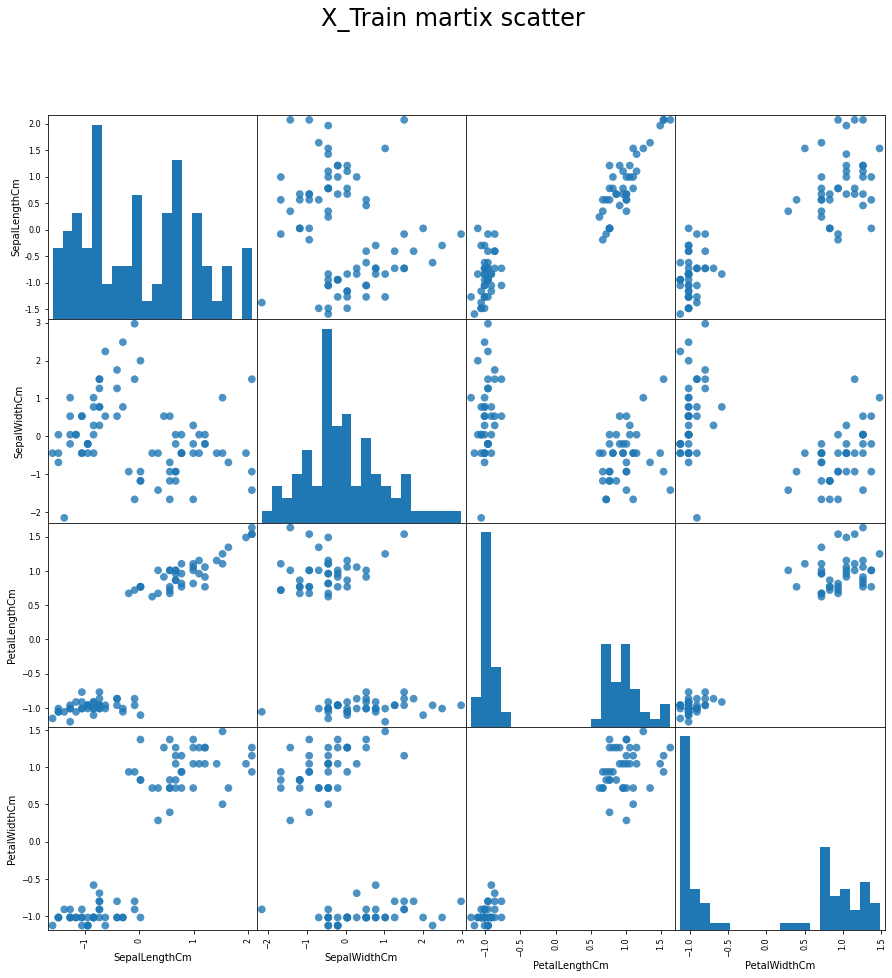

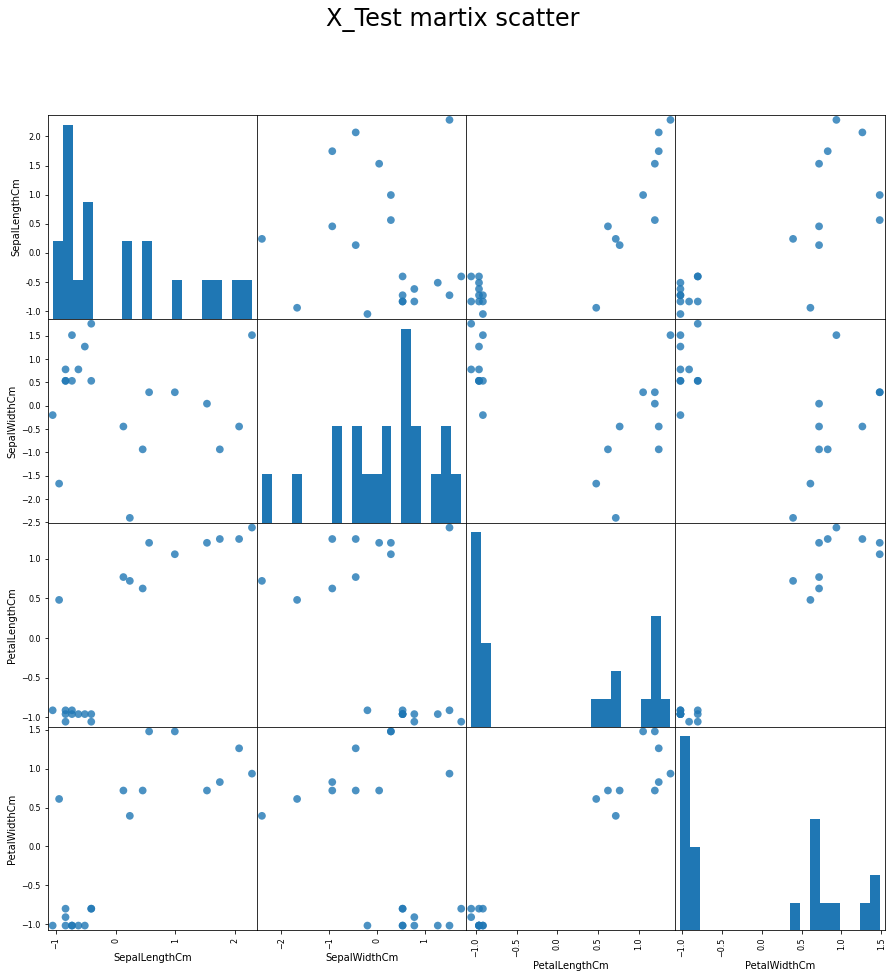

In [18]:
grr=pd.plotting.scatter_matrix(pd.DataFrame(X_train, columns=array_iris.columns[1:5]), figsize=(15,15),marker="o",hist_kwds={'bins':20},s=60,alpha=.8)
plt.suptitle('X_Train martix scatter', fontsize = 24)

grr=pd.plotting.scatter_matrix(pd.DataFrame(X_test, columns=array_iris.columns[1:5]), figsize=(15,15),marker="o",hist_kwds={'bins':20},s=60,alpha=.8)
plt.suptitle('X_Test martix scatter', fontsize = 24)

5) Trees model

In [22]:
trees_model = DecisionTreeClassifier()
trees_model.fit(X_train, y_train)

DecisionTreeClassifier()

                precision    recall  f1-score   support

   Iris-setosa       1.00      1.00      1.00        10
Iris-virginica       1.00      1.00      1.00        10

      accuracy                           1.00        20
     macro avg       1.00      1.00      1.00        20
  weighted avg       1.00      1.00      1.00        20



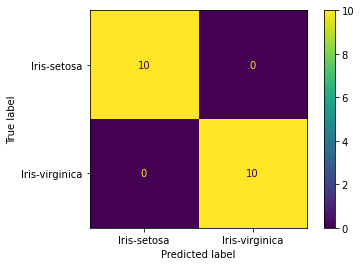

In [20]:
y_pred = trees_model.predict(X_test)
confm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=confm,display_labels=trees_model.classes_).plot()

print(classification_report(y_test, y_pred))

6) In a result, we've got values sensitivity and specificity for solution

In [21]:
sensitivity = confm[0,0]/(confm[0,0] + confm[0,1])
print('Sensitivity value = ', sensitivity)

specificity = confm[1,1]/(confm[1,0] + confm[1,1])
print('Specificity value  = ', specificity)

Sensitivity value =  1.0
Specificity value  =  1.0
